# Deeplens implementation
In this notebook, some basic observations of the dataset generated by the deeplenstronomy wrapper are performed. To run this notebook, an installation of the deeplenstronomy wrapper is necessary.
The residual maps are maps that compare strictly different model. The added noise is moreover really smooth compare to the implementation performed in `datanalysis.ipynb`.
Those differences may come from the image model that is probably defined differently.

## 1. Import

In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath('deeplens.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

import numpy as np
import pandas as pd

import deeplenstronomy.deeplenstronomy as dl
from deeplenstronomy.visualize import view_image

from helpers.data_generation.file_management import read_hdf5
from deeplenshelpers import*


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

## 2. Dataset
The dataset is build with a '.yalm' file where all configurations are define. The models' parameters vary with an uniform distribution.

Lens' light parameters:
* Model : Sersic ellipse
* Amplitude : $amp = 22$
* Sersic radius : $R_{sersic} = 0.25$
* Sersic index : $n_{sersic}= 2.9$
* Ellipsity* : $e_1 = 0$   and   $e_2 = 0.09$
* Center : $x = 0$ and $y = 0$

Lens' mass variation :
- Model : Power-law Elliptical Mass Distribution

>$\kappa = \frac{3-\gamma }{2}\left ( \frac{\theta_E}{\sqrt{q e_1^2+ e_2^2/q}} \right )^{\gamma-1}$
 
* Einstein radius: $\theta_E \in \mathcal{N}_{log}(\mu:0,\sigma:0.1)$

* Power law slope: $\gamma \in \mathcal{N}_{log}(\mu:0.7,\sigma:0.1)$
* Ellipsity* : $e_1 \in \mathcal{N}(\mu :0, \sigma : 0.2)$   and $e_2 \in \mathcal{N}(\mu :0, \sigma : 0.2)$
* Center : $x = 0$ and $y = 0$

Source variation :
* Model : Sersic ellipse
* Amplitude : $amp \in  \mathcal{U}(20, 24)$
* Sersic radius : $R_{sersic} \in  \mathcal{N}_{log}(\mu:-0.7,\sigma:0.4)$
* Sersic index : $n_{sersic} \in  \mathcal{N}_{log}(\mu:0.7,\sigma:0.4)$
* Ellipsity* : $e_1 \in \mathcal{N}(\mu :0, \sigma : 0.2)$   and $e_2 \in \mathcal{N}(\mu :0, \sigma : 0.2)$
* Center : $x \in \mathcal{U}(-0.5,0.5)$ and $y \in \mathcal{U}(-0.5,0.5)$

Note* : The ellipsity range is determined with the following equations, where $q \in \mathcal{N}(0.7, 1)$ and $\phi \in \mathcal{N}(0, \frac{\pi}{2})$

>$e_1 = \frac{1-q}{1+q}\cos{(2\phi)}$     and     $e_2 = \frac{1-q}{1+q}\sin{(2\phi)} $

In [2]:
config_file_name1 = 'data/configFile/config_model1.yaml' # Mass variation
dataset1 = dl.make_dataset(config_file_name1)

config_file_name2 = 'data/configFile/config_model2.yaml' # Source variation
dataset2 = dl.make_dataset(config_file_name2)

config_file_name3 = 'data/configFile/config_model3.yaml' # Mass & source variation
dataset3 = dl.make_dataset(config_file_name3)

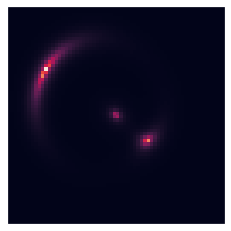

In [3]:
view_image(dataset2.CONFIGURATION_1_images[9][0]) # image without noise

In [4]:
# Build the four classes 
config_repo_model = 'data/configFile/config_model'


for i in np.arange(1,4):
    model_name = config_repo_model + str(i) + '.yaml'
    res = ResidualDeepLens(model_name)
    res.build(i)
print('Data Generation Finished')

Data Generation Finished


In [5]:
metadata = pd.DataFrame()
for i in np.arange(1,4):
    [img, meta] = read_hdf5(str(i), path = "data/dataSet/")
    metadata = pd.concat([metadata,meta], ignore_index=True)
    if i == 1:
        final_array = img
    else:
         final_array = np.concatenate((final_array, img))
metadata ['ID'] = np.arange(0,final_array.shape[0])

print('Reading Data Finished')

Reading Data Finished


## 2. Images generated by the Lenstronomy simulator
### 2.1. Residual maps

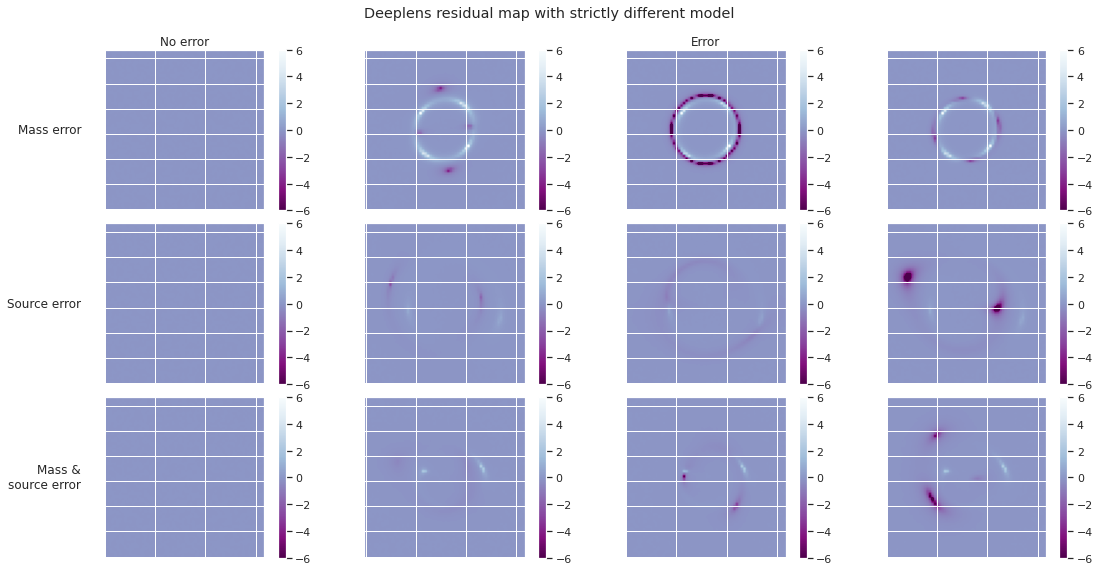

In [6]:
f, axes = plt.subplots(3, 4, figsize=(16, 8), sharex=False, sharey=False)
norm = colors.Normalize(vmin=-6, vmax=6)

for i in range(0,4):
    pos1 = axes[0,i].imshow(final_array[i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos2 = axes[1,i].imshow(final_array[40+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    pos3 = axes[2,i].imshow(final_array[80+i,0,:,:], vmin=-6, vmax=6, origin='lower',cmap=plt.cm.BuPu_r)
    axes[0,i].set_yticklabels([]); axes[0,i].set_xticklabels([])
    axes[1,i].set_yticklabels([]); axes[1,i].set_xticklabels([])
    axes[2,i].set_yticklabels([]); axes[2,i].set_xticklabels([])
    f.colorbar(pos1, ax=axes[0,i])
    f.colorbar(pos2, ax=axes[1,i])
    f.colorbar(pos3, ax=axes[2,i])
pad = 5
axes[0,0].annotate('No error', xy=(0.5, 1), xytext=(0, pad),
                   xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')
axes[0,2].annotate('Error', xy=(0.5, 1), xytext=(0, pad),
                   xycoords='axes fraction', textcoords='offset points', ha='center', va='baseline')

axes[0,0].annotate('Mass error', xy=(0, 0.5), xytext=(-axes[0,0].yaxis.labelpad - pad, 0),
                   xycoords=axes[0,0].yaxis.label, textcoords='offset points', ha='right', va='center')
axes[1,0].annotate('Source error', xy=(0, 0.5), xytext=(-axes[1,0].yaxis.labelpad - pad, 0),
                   xycoords=axes[1,0].yaxis.label, textcoords='offset points', ha='right', va='center')
axes[2,0].annotate('Mass &\nsource error', xy=(0, 0.5), xytext=(-axes[2,0].yaxis.labelpad - pad, 0),
                   xycoords=axes[2,0].yaxis.label, textcoords='offset points', ha='right', va='center')

f.suptitle('Deeplens residual map with strictly different model', size = 'large')
f.tight_layout()
plt.show()

### 2.2. Simulated images

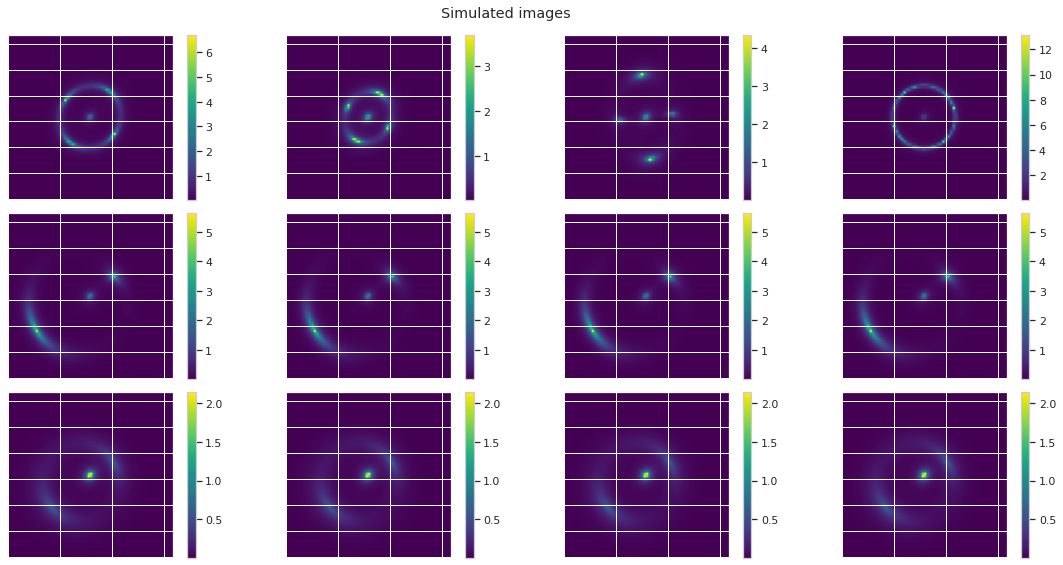

In [7]:
f, axes = plt.subplots(3, 4, figsize=(16, 8), sharex=False, sharey=False)
norm = colors.Normalize(vmin=-6, vmax=6)
config_file_name1 = 'data/configFile/config_model1.yaml' # Mass variation
dataset1 = dl.make_dataset(config_file_name1)

config_file_name2 = 'data/configFile/config_model2.yaml' # Source variation
dataset2 = dl.make_dataset(config_file_name2)

config_file_name3 = 'data/configFile/config_model3.yaml' # Mass & source variation
dataset3 = dl.make_dataset(config_file_name3)
p_decal = 10
sns.set_theme(style="whitegrid")

for i in range(0,4):
    image_real = dataset1.CONFIGURATION_1_images[i][0]
    pos1 = axes[0,i].imshow(image_real,  cmap = 'viridis', origin='lower')
    image_real = dataset2.CONFIGURATION_1_images[9][0]
    pos2 = axes[1,i].imshow(image_real, cmap = 'viridis', origin='lower')
    image_real = dataset3.CONFIGURATION_1_images[9][0]
    pos3 = axes[2,i].imshow(image_real,  cmap = 'viridis', origin='lower')
    axes[0,i].set_yticklabels([]); axes[0,i].set_xticklabels([])
    axes[1,i].set_yticklabels([]); axes[1,i].set_xticklabels([])
    axes[2,i].set_yticklabels([]); axes[2,i].set_xticklabels([])
    f.colorbar(pos1, ax=axes[0,i])
    f.colorbar(pos2, ax=axes[1,i])
    f.colorbar(pos3, ax=axes[2,i])

f.suptitle('Simulated images', size = 'large')
f.tight_layout()
plt.show()

plt.show()